In [2]:
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import glob

In [3]:
tasmax = xr.open_dataarray('/data/keeling/a/mailes2/a/LOCA2/tasmax.CNRM-CM6-1.historical.r1i1p1f2.1950-2014.LOCA_16thdeg_v20220413.cent.nc')

In [4]:
tasmax

<xarray.DataArray 'tasmax' (time: 23741, lat: 130, lon: 291)>
[898122030 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 263.9 264.0 264.0 264.1 ... 281.8 281.9 282.0 282.0
  * lat      (lat) float64 34.59 34.66 34.72 34.78 ... 42.47 42.53 42.59 42.66
  * time     (time) datetime64[ns] 1950-01-01T12:00:00 ... 2014-12-31T12:00:00
Attributes:
    units:    K
    history:   pierce 2023-07-26 12:32:54.553488 /net/mead24/data/LOCA2_CONUS...
    region::  cent

Text(0.5, 1.0, 'LOCA2 - CNRM-CM6-1 Historical TASMAX')

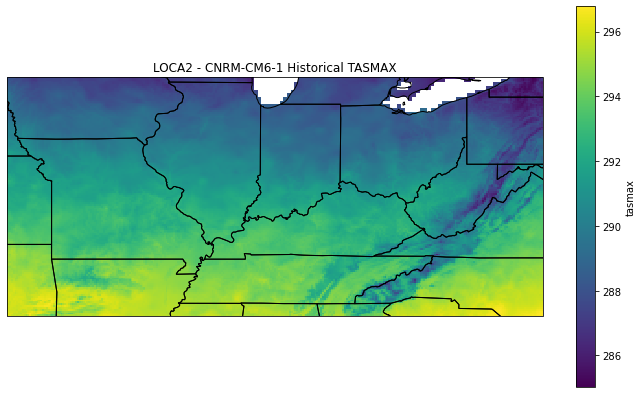

In [17]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree())
tasmax.mean('time').plot()
ax.add_feature(cfeature.STATES)
plt.title('LOCA2 - CNRM-CM6-1 Historical TASMAX')

Text(0.5, 1.0, 'LOCA2 - CNRM-CM6-1 Historical TASMAX')

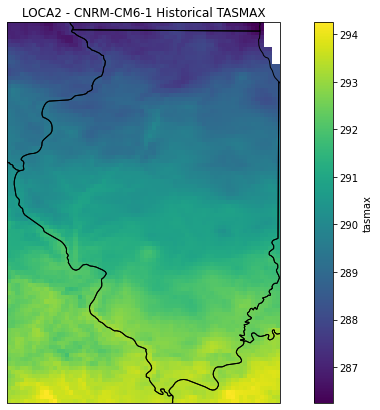

In [22]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree())
tasmax.mean('time').sel(lat=slice(36.9,42.6)).sel(lon=slice(268.4,272.5)).plot()
ax.add_feature(cfeature.STATES)
plt.title('LOCA2 - CNRM-CM6-1 Historical TASMAX')

# Trying pydap

In [2]:
import requests

In [3]:
loca_tree = requests.get('https://cirrus.ucsd.edu/~pierce/LOCA2/')
loca_tree

<Response [200]>

In [5]:
loca_tree.headers

{'Date': 'Fri, 27 Sep 2024 16:31:21 GMT', 'Server': 'Apache/2.4.52 (Ubuntu)', 'X-Frame-Options': 'DENY', 'X-Content-Type-Options': 'nosniff', 'Vary': 'Accept-Encoding', 'Content-Encoding': 'gzip', 'Content-Length': '491', 'Keep-Alive': 'timeout=5, max=100', 'Connection': 'Keep-Alive', 'Content-Type': 'text/html;charset=UTF-8'}

# ACCESS-CM2 SSP585 PR Data Testing

In [3]:
# Find the TREFHT files in the historical data

files_pr = glob.glob('/data/keeling/a/cristi/a/esm_data/downscaled_data/LOCA2/ACCESS-CM2/ssp585/*')
print(files_pr)

['/data/keeling/a/cristi/a/esm_data/downscaled_data/LOCA2/ACCESS-CM2/ssp585/pr.ACCESS-CM2.ssp585.r1i1p1f1.2015-2044.LOCA_16thdeg_v20240915.cent.nc', '/data/keeling/a/cristi/a/esm_data/downscaled_data/LOCA2/ACCESS-CM2/ssp585/pr.ACCESS-CM2.ssp585.r2i1p1f1.2015-2044.LOCA_16thdeg_v20240915.cent.nc', '/data/keeling/a/cristi/a/esm_data/downscaled_data/LOCA2/ACCESS-CM2/ssp585/pr.ACCESS-CM2.ssp585.r3i1p1f1.2015-2044.LOCA_16thdeg_v20240915.cent.nc']


In [5]:
xr.open_dataset(files_pr[0])

<xarray.Dataset>
Dimensions:  (lon: 291, lat: 130, time: 10958)
Coordinates:
  * lon      (lon) float64 263.9 264.0 264.0 264.1 ... 281.8 281.9 282.0 282.0
  * lat      (lat) float64 34.59 34.66 34.72 34.78 ... 42.47 42.53 42.59 42.66
  * time     (time) datetime64[ns] 2015-01-01T12:00:00 ... 2044-12-31T12:00:00
Data variables:
    pr       (time, lat, lon) float32 ...
Attributes:
    history:   pierce 2024-09-24 16:30:07.126542 /net/mead24/data/LOCA2_CONUS...

In [7]:
pr = xr.open_mfdataset(files_pr,combine="nested",concat_dim='ensemble_mem',use_cftime=True)
pr

<xarray.Dataset>
Dimensions:  (lon: 291, lat: 130, time: 10958, ensemble_mem: 3)
Coordinates:
  * lon      (lon) float64 263.9 264.0 264.0 264.1 ... 281.8 281.9 282.0 282.0
  * lat      (lat) float64 34.59 34.66 34.72 34.78 ... 42.47 42.53 42.59 42.66
  * time     (time) object 2015-01-01 12:00:00 ... 2044-12-31 12:00:00
Dimensions without coordinates: ensemble_mem
Data variables:
    pr       (ensemble_mem, time, lat, lon) float32 dask.array<chunksize=(1, 10958, 130, 291), meta=np.ndarray>
Attributes:
    history:   pierce 2024-09-24 16:30:07.126542 /net/mead24/data/LOCA2_CONUS...

Text(0.5, 1.0, 'ACCESS-CM2 SSP585 PR Averaged Over Time')

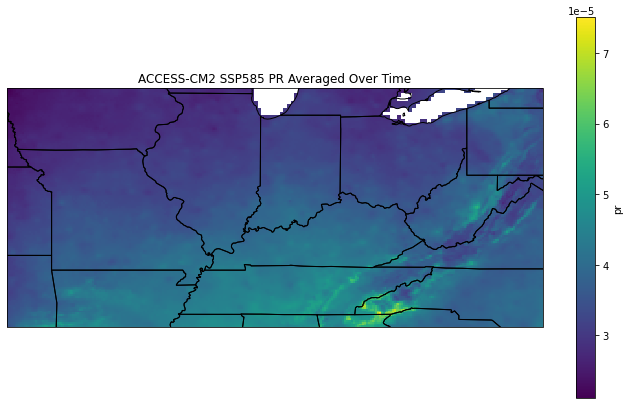

In [14]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree())
pr.pr.mean('time').mean('ensemble_mem').plot()
ax.add_feature(cfeature.STATES)
plt.title('ACCESS-CM2 SSP585 PR Averaged Over Time')